<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/statistic_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np


= = = = = = = = = = = 
# NOEMAL Distribution 
= = = = = = = = = = = 

When dealing with
continuous data, you
calculate probabilities
for a range of values.


In [87]:
import scipy.stats as st
#def Zscore(x, mean, std):
#z = x - mean / std

# probability to z score
st.norm.ppf(.95)
# z score to probability 
st.norm.cdf(1.42)

0.9221961594734536


= = = = = = = = = = = 
# Discrete Distribution 
= = = = = = = = = = = 



In [54]:
# geometric_distribution
def geometric_distribution(p, r = 1):
  '''
  1 You run a series of independent trials
  2 There can be either a success or failure for each trial, and the
    probability of success is the same for each trial.
  3 The main thing you’re interested in is how many trials are needed in
    order to get the first successful outcome
  the mode of any geometric distribution is always 1. it means that the probability of success on the first try is the highest
  '''
  q = 1 - p  # failure
  SUCCESS_probability_of_r_trails = p * q**r 
  SUCCESS_probability_in_grater_than_r_trail = q ** r
  SUCCESS_probability_in_lower_than_r_trail = 1 - (q ** r)
  exceptin = 1 / p
  variance = q / (p ** 2)
  print(f'SUCCESS_probability_of_{r}_trails:\t\t {SUCCESS_probability_of_r_trails *100} %')
  print(f'SUCCESS_probability_in_grater_than_r_trail:\t {SUCCESS_probability_in_grater_than_r_trail*100} %')
  print(f'SUCCESS_probability_in_lower_than_r_trail:\t {SUCCESS_probability_in_lower_than_r_trail*100} %')
  print(f'SUCCESS exceptin: {exceptin}')
  print(f'SUCCESS variance: {variance}')
  # TODOOO : return statements -> dictionary of info


geometric_distribution(0.2, 2)

SUCCESS_probability_of_2_trails:		 12.800000000000002 %
SUCCESS_probability_in_grater_than_r_trail:	 64.00000000000001 %
SUCCESS_probability_in_lower_than_r_trail:	 35.999999999999986 %
SUCCESS exceptin: 5.0
SUCCESS variance: 19.999999999999996


In [63]:
def combination(n, r):
  return (factorial(n))/(factorial(r) * factorial(n-r))
def binomial(p, n, r = 1):
  '''
  1  You’re running a series of independent trials.
  2  There can be either a success or failure for each trial, and the
     probability of success is the same for each trial.
  3  There are a finite number of trials
  ex : want to find how many question are we can answer in n questions
  The shape of the binomial distribution depends on the values of n and p.
   if np and nq greater than 5, we can use normal distribution with countity correction
   if n >> and p << we can use poission distribution X ~ (np) instead of binomial 
  '''
  c = combination(n,r)
  q = 1 - p
  px_x = (p ** r) * (q ** (n-r)) * c  # the number of successful outcomes out of n trials
  expect = n * p
  var = n * p * q
  print(f'the number of {r} successful outcomes  out of {n} trials: ', px_x)
  print(f'expectation: {expect} \t variance: {var}')
  # TODOOO : return statements -> dictionary of info
binomial(.25, 5, 3)

the number of 3 successful outcomes  out of 5 trials:  0.087890625
expectation: 1.25 	 variance: 0.9375


In [81]:
def factorial(n):
  if n == 1 or n == 0:
    return 1
  else:
    return n * factorial(n-1)
def Poisson(landa, r):
  '''
  1  Individual events occur at random and independently in a given
     interval. This can be an interval of time or space—for example,
     during a week, or per mile.
  2  You know the mean number of occurrences in the interval or the
     rate of occurrences, and it’s finite. The mean number of occurrences
    is normally represented by the Greek letter λ (lambda)
  Let’s use the variable X to represent the number of occurrences in
    the given interval
  '''
  po_x = ((np.exp(1) ** -landa) * (landa ** r)) / float(factorial(r))
  return po_x
Poisson(2.5, 5)

0.06680094289054264

= = = = = = = = = = = 
# Arrangement     in horse race
= = = = = = = = = = = 

In [32]:

def factorial(n):
  # recursive
  if n == 1:
    return n
  else:
    return n * factorial(n-1)

horses = np.arange(0,5)
print(f'in a horse race with {len(horses)} pleyer; in the end there is \
        {factorial(len(horses))} way to arrange horses') 

# ||||||||||| -------------------- |||||||||||
# ||||||||||| -------------------- |||||||||||
# permutation
def permutation(n,r):
  '''
  Permutations give the total number of ways you can
  order a certain number of objects (r), drawn from
  a larger pool of objects (n).
  order 
  '''
  B = n-r
  perm = (factorial(n))/(factorial(B))
  return perm

pool = 20 
robject = 3
print(f'arrangement of {robject} objects from a pool of {pool} objects = {permutation(pool,robject)}')

# ||||||||||| -------------------- |||||||||||
# ||||||||||| -------------------- |||||||||||
# combinations
def combination(n,r):
  '''
  A combination is the number of ways in which you
  can choose objects from a pool, without caring about
  the exact order in which you choose them
  '''
  comb = (factorial(n))/(factorial(r) * factorial(n-r))
  return comb
print(combination(12,5))

in a horse race with 5 pleyer; in the end there is         120 way to arrange horses
arrangement of 3 objects from a pool of 20 objects = 6840.0
792.0


= = = = = = = = = = = 
# Expectation with a slot machine
= = = = = = = = = = = 


In [39]:
import numpy as np
import random


def slot_machine(maxx):
    # maxx is the maximum number of digits in a slot machine / we considered just a digit machine
    a = [random.randint(1, maxx), random.randint(1, maxx), random.randint(1, maxx)]
    return a


def do_sm(counter, maxx):
    d = []
    while counter > 0:
        c = 0
        for i in range(100):
            b = slot_machine(maxx)
            if b[0] == b[1] == b[2]:  # Equals to b[0] == b[1] & b[1] == b[2]
                c += 1
        d.append(c)
        counter -= 1
    return d


n = 5 # How many number are there in each slot 

exp = (1 / n ** 3) * n * 100  # There are three 3  slots with n numbers in each one
a = do_sm(1000, n)
print(
    f"we expect for 100 try - {exp} Equal number Occurs like 1 1 1 or 2 2 2\n \
        in our slotMachin we get {np.mean(a)} Equeals "
)


we expect for 100 try - 4.0 Equal number Occurs like 1 1 1 or 2 2 2
         in our slotMachin we get 3.991 Equeals 


# *very* basic 
like mean mode quartile and ...

In [35]:
import numpy as np
from collections import Counter


class sg_statistic:
    def __init__(self):
        pass

    def mean(self, d):
        a = sum(d)
        b = len(d)
        return a / b

    def median(self, d):
        a = len(d)
        if a % 2 == 0:
            b = int(a / 2) - 1  # -1 is for python because python start index from 0
            c = (d[b] + d[b + 1]) / 2
            return c
        else:
            b = ((a + 1) / 2) - 1
            return d[int(b)]

    def mode(self, values, frequency):
        return values[frequency.index(max(frequency))]

    def percentile(self, data, k):
        n = len(data)
        p = k * (n / 100)
        c = p - int(p)
        if c:  # p isnt integer
            return data[int(p)]
        else:  # p is integer
            return (data[int(p)] + data[int(p) - 1]) / 2
        return p

    def var(self, data):
        mu = self.mean(data)
        n = len(data)
        power = [x ** 2 for x in data]
        var = (sum(power) / n) - mu ** 2
        return var

    def present(self, data):
        q1 = self.percentile(data, 25)
        mediann = self.percentile(data, 50)
        q3 = self.percentile(data, 75)
        mean = self.mean(data)
        varr = self.var(data)
        A = {
            "q1": q1,
            "median": mediann,
            "q3": q3,
            "mean": mean,
            "var": varr,
            "std": varr ** (0.5),
        }
        return A

    def zscore(self, data, X):
        mu = self.mean(data)
        std = self.var(data) ** 0.5
        z = (X - mu) / std
        return z

    def proba(self, data, x):  # todo: make constraint for input of x / x must in data
        a = Counter(data)
        return a[x] / len(data)


# to do

hah = sg_statistic()
data = np.random.normal(10, 20, 800)
data1 = [4, 5, 6, 3, 8, 6, 2, 3, 5, 1]  # len 10
data2 = [[4, 5, 8, 6, 3, 2, 1], [10, 2, 30, 51, 23, 123, 56]]
data3 = [3, 3, 6, 7, 7, 10, 10, 10, 11, 13, 30]
data4 = [1, 1, 1, 2]
data5 = [15, 60, 75, 43, 95, 100, 10, 47, 63]

test = data
print(
    hah.zscore(data5, 90),
    hah.present(test),
    "percen ",
    hah.percentile(test, 25),
    hah.mode(data2[0], data2[1]),
    hah.mean(test),
    hah.median(test),
    sep=" ---\n--- ",
)


hah.proba(data1, 3)


1.1305708428974124 ---
--- {'q1': -4.905006674751906, 'median': -4.884550168793184, 'q3': 20.471331522465128, 'mean': 9.886103086673154, 'var': 391.6696119760219, 'std': 19.790644556861253} ---
--- percen  ---
--- -4.905006674751906 ---
--- 2 ---
--- 9.886103086673154 ---
--- -4.884550168793184


0.2

# Box plot

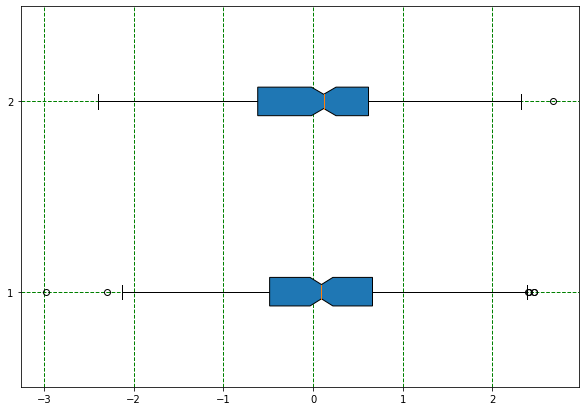

[array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
        -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
         0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
         0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
        -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
         1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
        -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
         0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
         0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
        -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
        -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
         0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
        -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
        -0.52929608,  1.04618286, -1.41855603, -0.3

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np


# Creating dataset
np.random.seed(10)
data1 = np.random.normal(0, 1, 200)
data2 = np.random.normal(0, 1, 200)
data = [data1, data2]
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
plt.grid(color = 'green', linestyle = '--', linewidth = 1)
# show plot
plt.show()
data

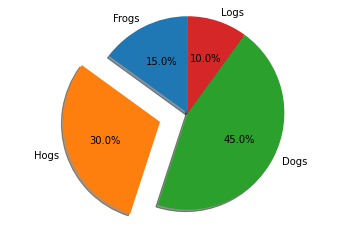

In [ ]:
# pie chart
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.3, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

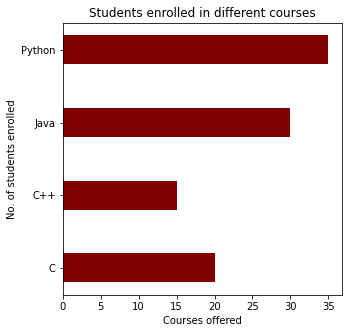

In [ ]:
# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
		'Python':35}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.barh(courses, values, color ='maroon',height = 0.4)
# plt.bar(courses, values, color ='maroon',width = 0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


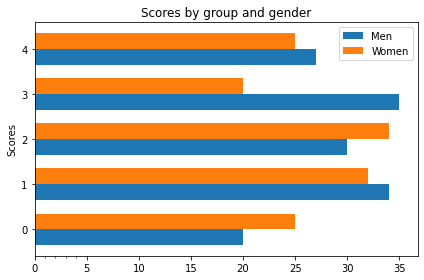

In [ ]:
# split-category bar chart
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
height = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, men_means,height, label='Men')
rects2 = ax.barh(x + width/2, women_means,height, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()

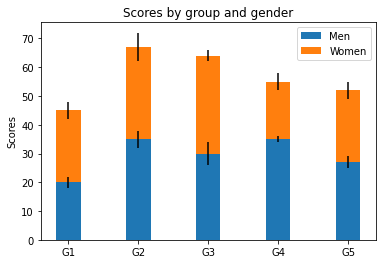

In [ ]:
# segmented bar chart
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

(array([2.0000e+00, 2.1000e+01, 5.1000e+01, 2.3500e+02, 7.8100e+02,
        2.1000e+03, 4.5730e+03, 8.3390e+03, 1.2758e+04, 1.6363e+04,
        1.7345e+04, 1.4923e+04, 1.0920e+04, 6.4830e+03, 3.1070e+03,
        1.3810e+03, 4.5300e+02, 1.2200e+02, 3.6000e+01, 7.0000e+00]),
 array([3.20889223, 3.38336526, 3.55783829, 3.73231132, 3.90678435,
        4.08125738, 4.25573041, 4.43020344, 4.60467647, 4.7791495 ,
        4.95362253, 5.12809556, 5.30256859, 5.47704162, 5.65151465,
        5.82598768, 6.00046071, 6.17493374, 6.34940677, 6.5238798 ,
        6.69835283]),
 <a list of 20 Patch objects>)

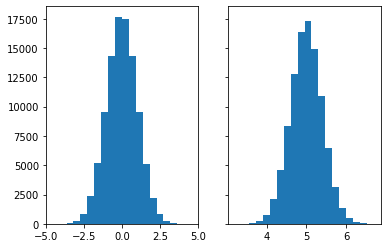

In [ ]:
N_points = 100000
n_bins = 20
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)
# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=False)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)